In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [12]:
# We can fetch the data and pass it to the df
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv"
r = requests.get(url)

data = StringIO(r.text)

air_quality = pd.read_csv(data)
air_quality.head()

,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


In [16]:
# Or we can also simply pass the url of the data to df
url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv"
air_quality = pd.read_csv(url, index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


The `pd.read_csv()` function is used to read a CSV file and convert it into a pandas DataFrame.

In your code:

- `"data/air_quality_no2.csv"` is the path to the CSV file you want to read. It's relative to the current working directory.

- `index_col=0` tells pandas to use the first (0th) column as the index of the DataFrame. The index of a DataFrame is like an address, that’s how any data point across the DataFrame or Series can be accessed. Rows and columns both have indexes, rows indices are called as index and for columns its general column names.

- `parse_dates=True` instructs pandas to try to parse the index as dates. This is useful if the index column in your CSV file contains date strings, and you want to convert them into a `DatetimeIndex` instead of leaving them as strings. This makes it easier to perform time series analysis on the data.

So, the resulting DataFrame will have its index set to the first column of the CSV file, with the index values parsed as dates.

<Axes: xlabel='datetime'>

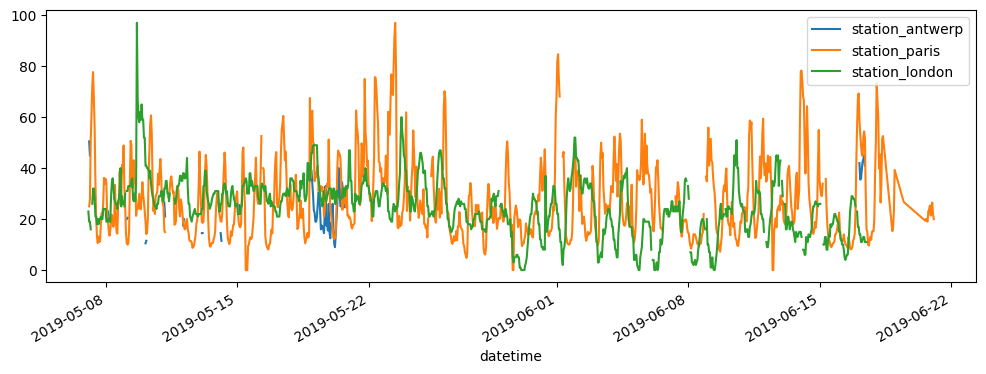

In [25]:
air_quality.plot(figsize=(12,4))

# With a DataFrame, pandas creates by default one line plot for each of the columns with numeric data.

<Axes: xlabel='datetime'>

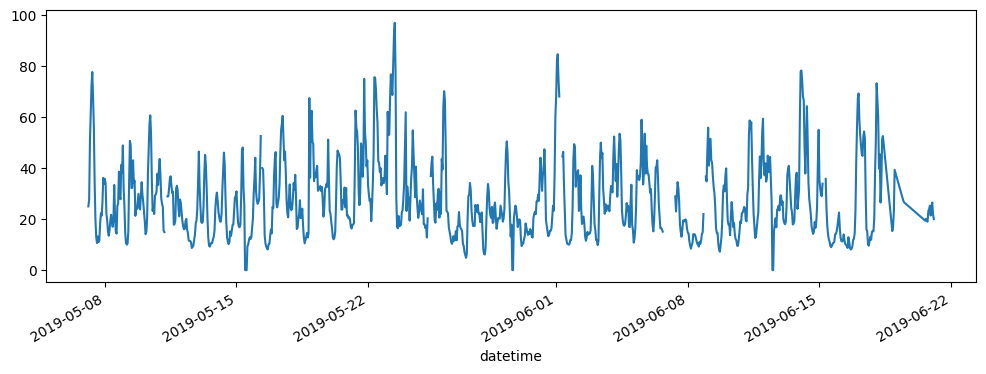

In [26]:
# I want to plot only the columns of the data table with the data from Paris.
air_quality['station_paris'].plot(figsize=(12,4))

The code you provided creates a scatter plot using the `plot.scatter()` function of pandas DataFrame. Here's what each parameter does:

- `x="station_london"` sets the column 'station_london' as the x-axis.
- `y="station_paris"` sets the column 'station_paris' as the y-axis.
- `alpha=0.5` sets the opacity of the points on the scatter plot. 0 is fully transparent and 1 is fully opaque. This can be useful when you have overlapping points, as it makes the density of the points more apparent.

This scatter plot will help you visually compare the NO2 values measured in London versus Paris. Each point on the plot represents a pair of measurements, with the London measurement on the x-axis and the Paris measurement on the y-axis.

<Axes: xlabel='station_london', ylabel='station_paris'>

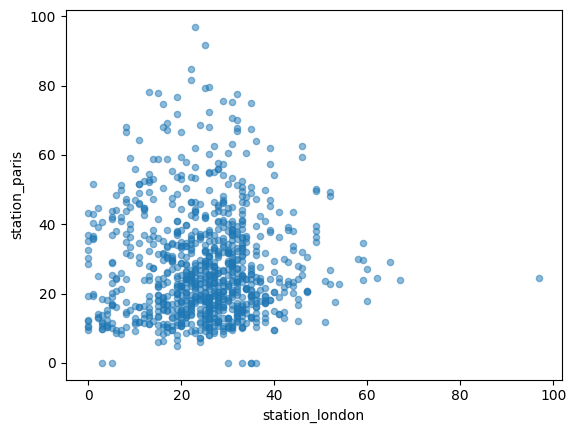

In [28]:
# I want to visually compare the NO2 values measured in London versus Paris.
air_quality.plot.scatter(x='station_london', y='station_paris', alpha=0.5)

The `c` parameter in the `scatter()` function is used to color the points in the scatter plot based on a third variable. This can be useful when you want to visualize the relationship between three variables instead of just two.

In the context of a scatter plot, the `x` and `y` parameters determine the position of each point, while the `c` parameter determines the color of each point. This allows you to see how the `x` and `y` values relate to a third variable.

For example, if you have a DataFrame with columns for 'station_london', 'station_paris', and 'station_antwerp', you could use 'station_london' for `x`, 'station_paris' for `y`, and 'station_antwerp' for `c`. This would create a scatter plot where the position of each point represents the NO2 values measured in London and Paris, and the color of each point represents the NO2 value measured in Antwerp.

If you don't need to visualize a third variable, you don't need to use the `c` parameter.

<Axes: xlabel='station_london', ylabel='station_paris'>

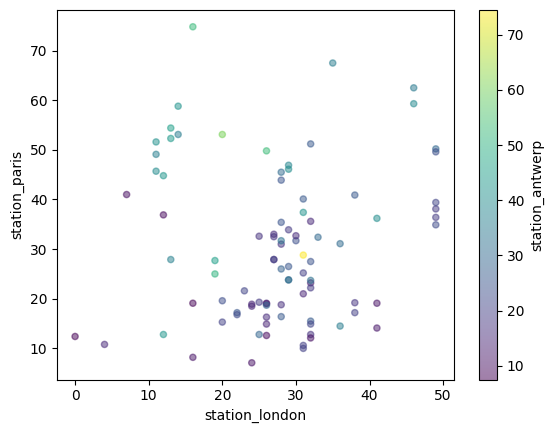

In [31]:
# c must be the legend of the colors
air_quality.plot.scatter(x='station_london', y='station_paris', c='station_antwerp', alpha=0.5, colormap='viridis')

<Axes: >

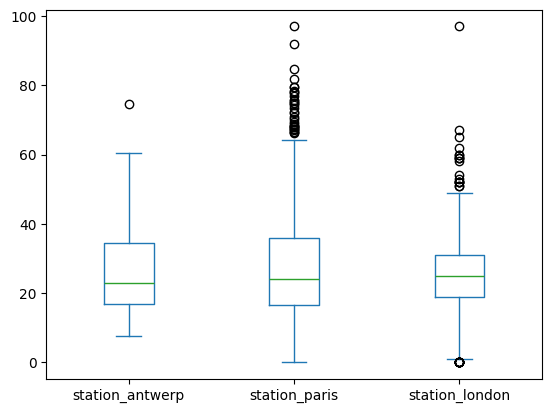

In [32]:
air_quality.plot.box()

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

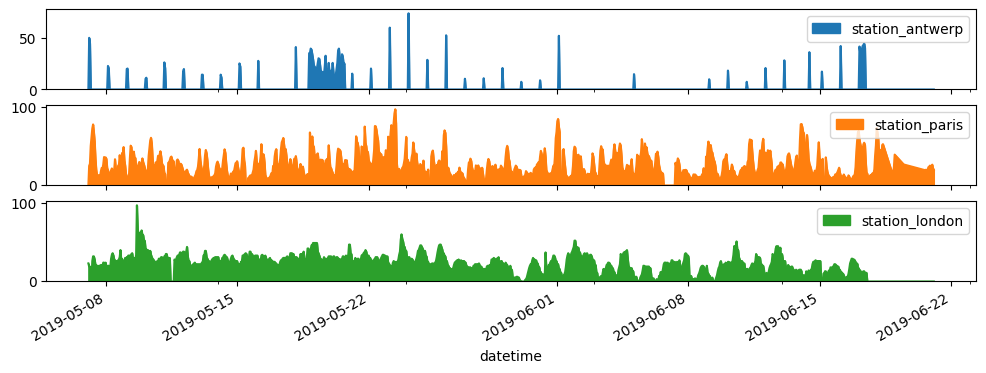

In [33]:
air_quality.plot.area(figsize=(12, 4), subplots=True)

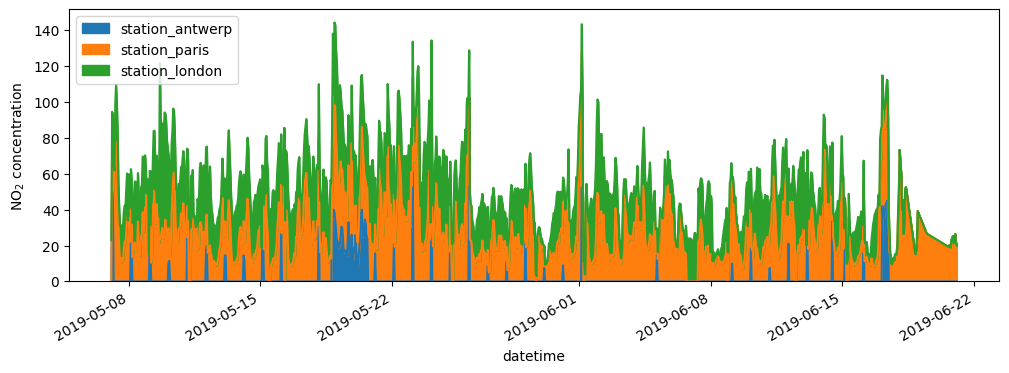

In [36]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("no2_concentrations.png")
